**Lecture 2 Notes**
- Complementary knapsack problem
- Implementations of knapsack problem
- - Decision tree with pruning
- - Dynamic programming
- Pseudo-polynomial complexity



**Complementary Knapsack**
Starter: Election
Could outcome have change if some Trump supporters had moved to a different state

PSET
- Assume 2 candidates, what minimum percentage do you need to win an election
- It is 23% (assumes win every state by 1)

**As An optimization Problem**
- Objective function to minimize:
- - Number of votes moved to flip a set of states from biden to trump
- Constraint:
- - Trump has at least the number of votes to win after flips

***Complement***
- The complement of a set is the set of elements that are in the universe but in in the set

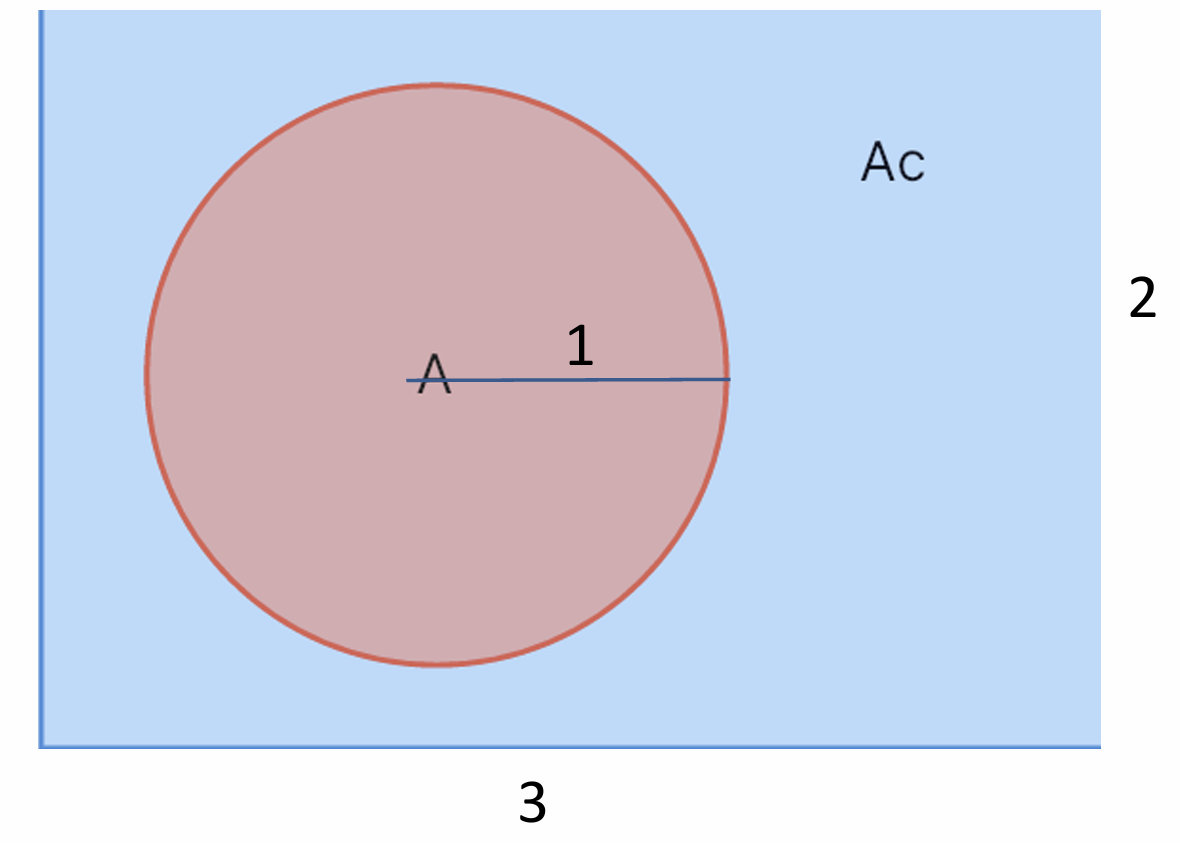

To find Ac find area of rectangle and substract area of circle

**Formula**
- Find a T that maximizes value subject to constraint

**Now:**
- T minimizes value, cost >= constraint


For election:
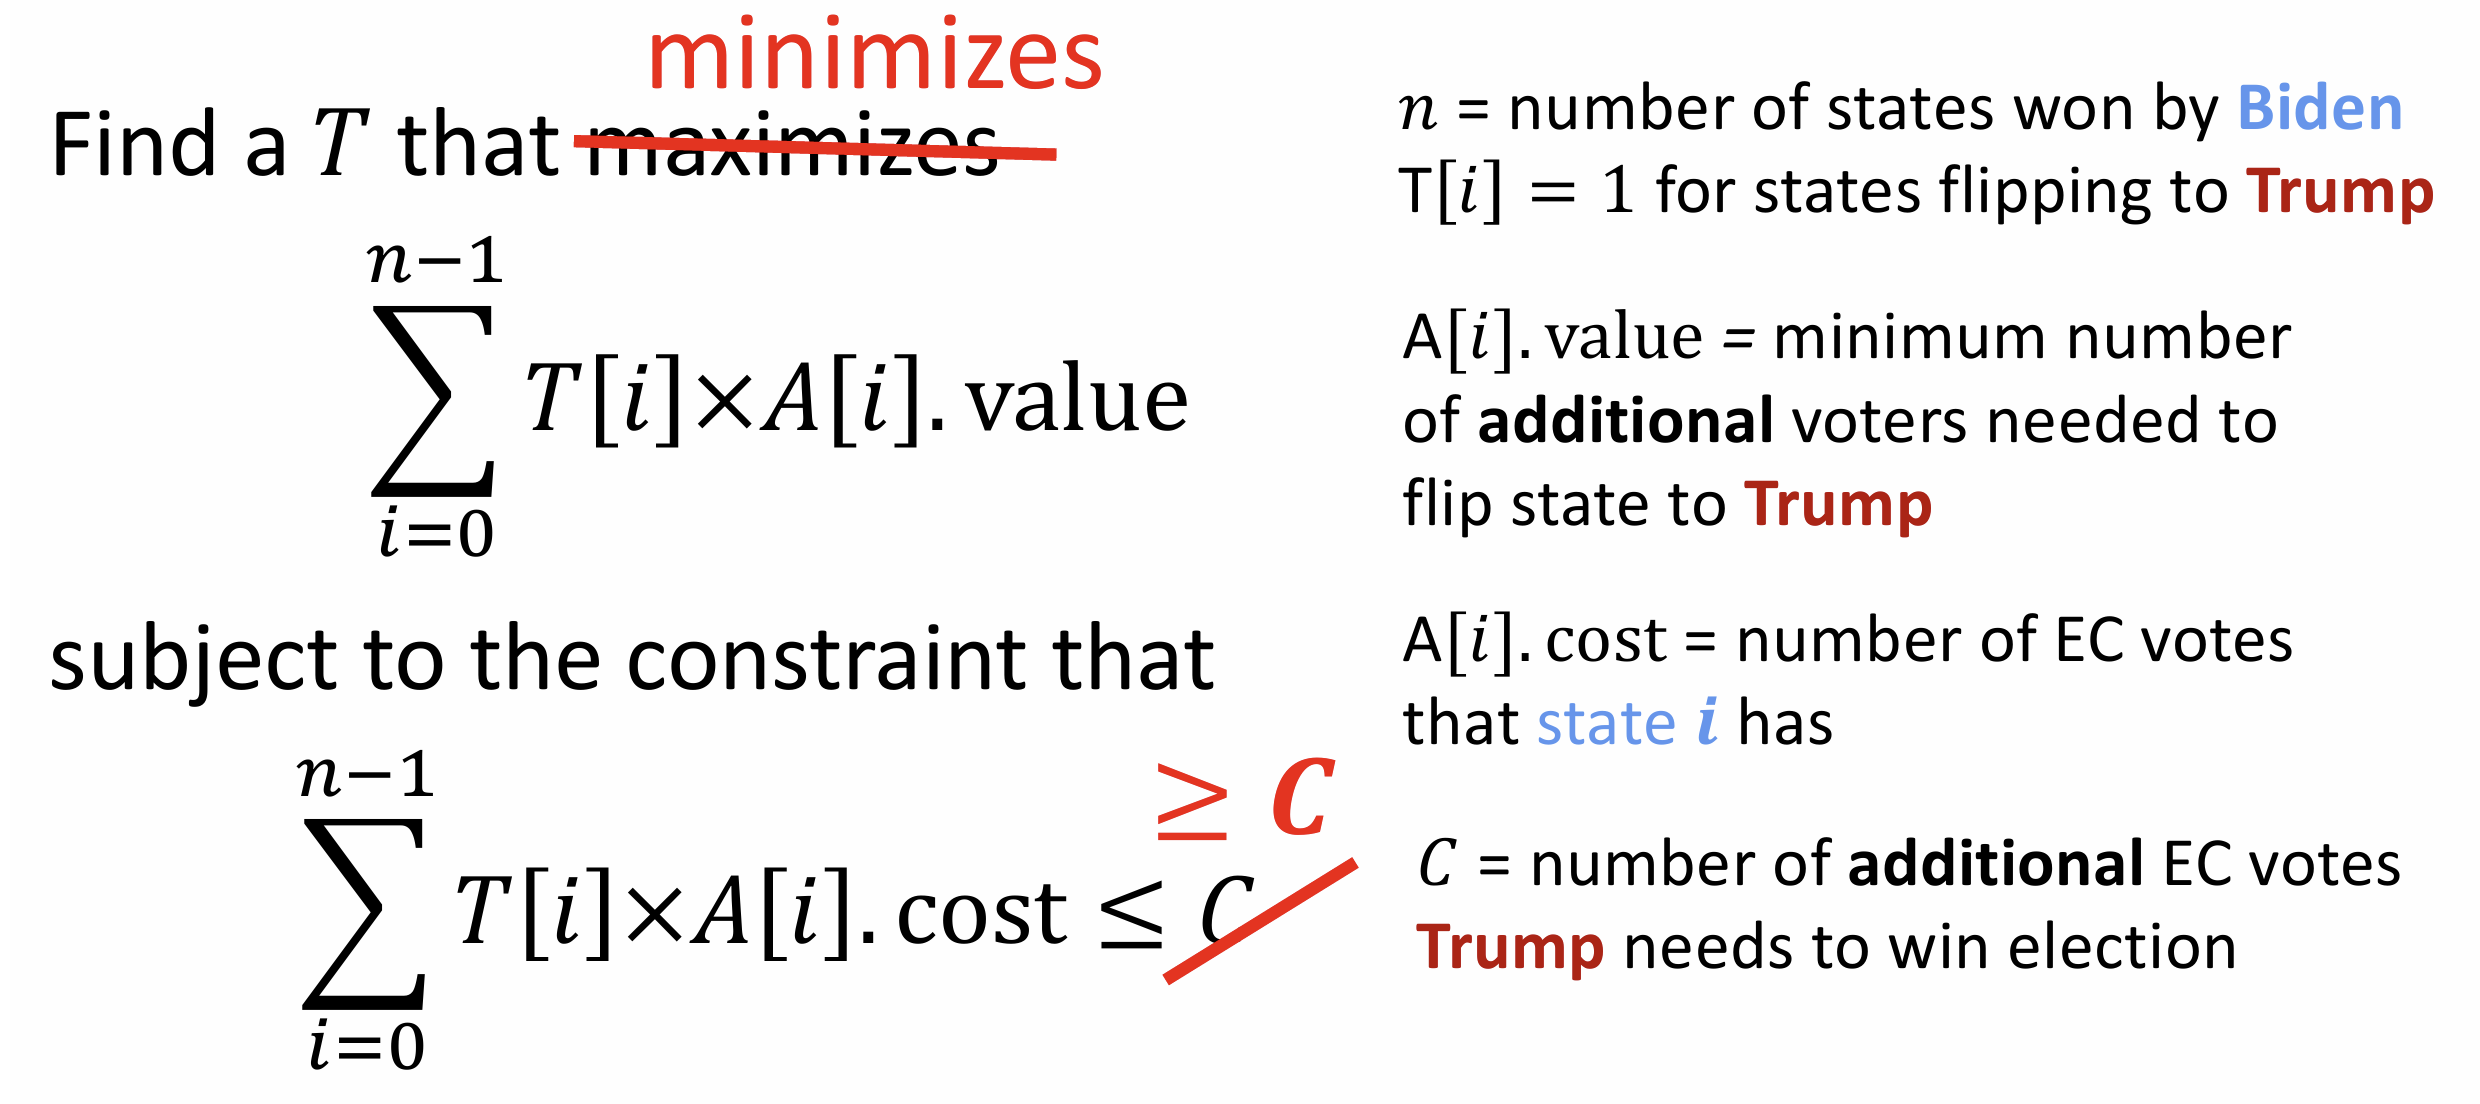

***Example***:
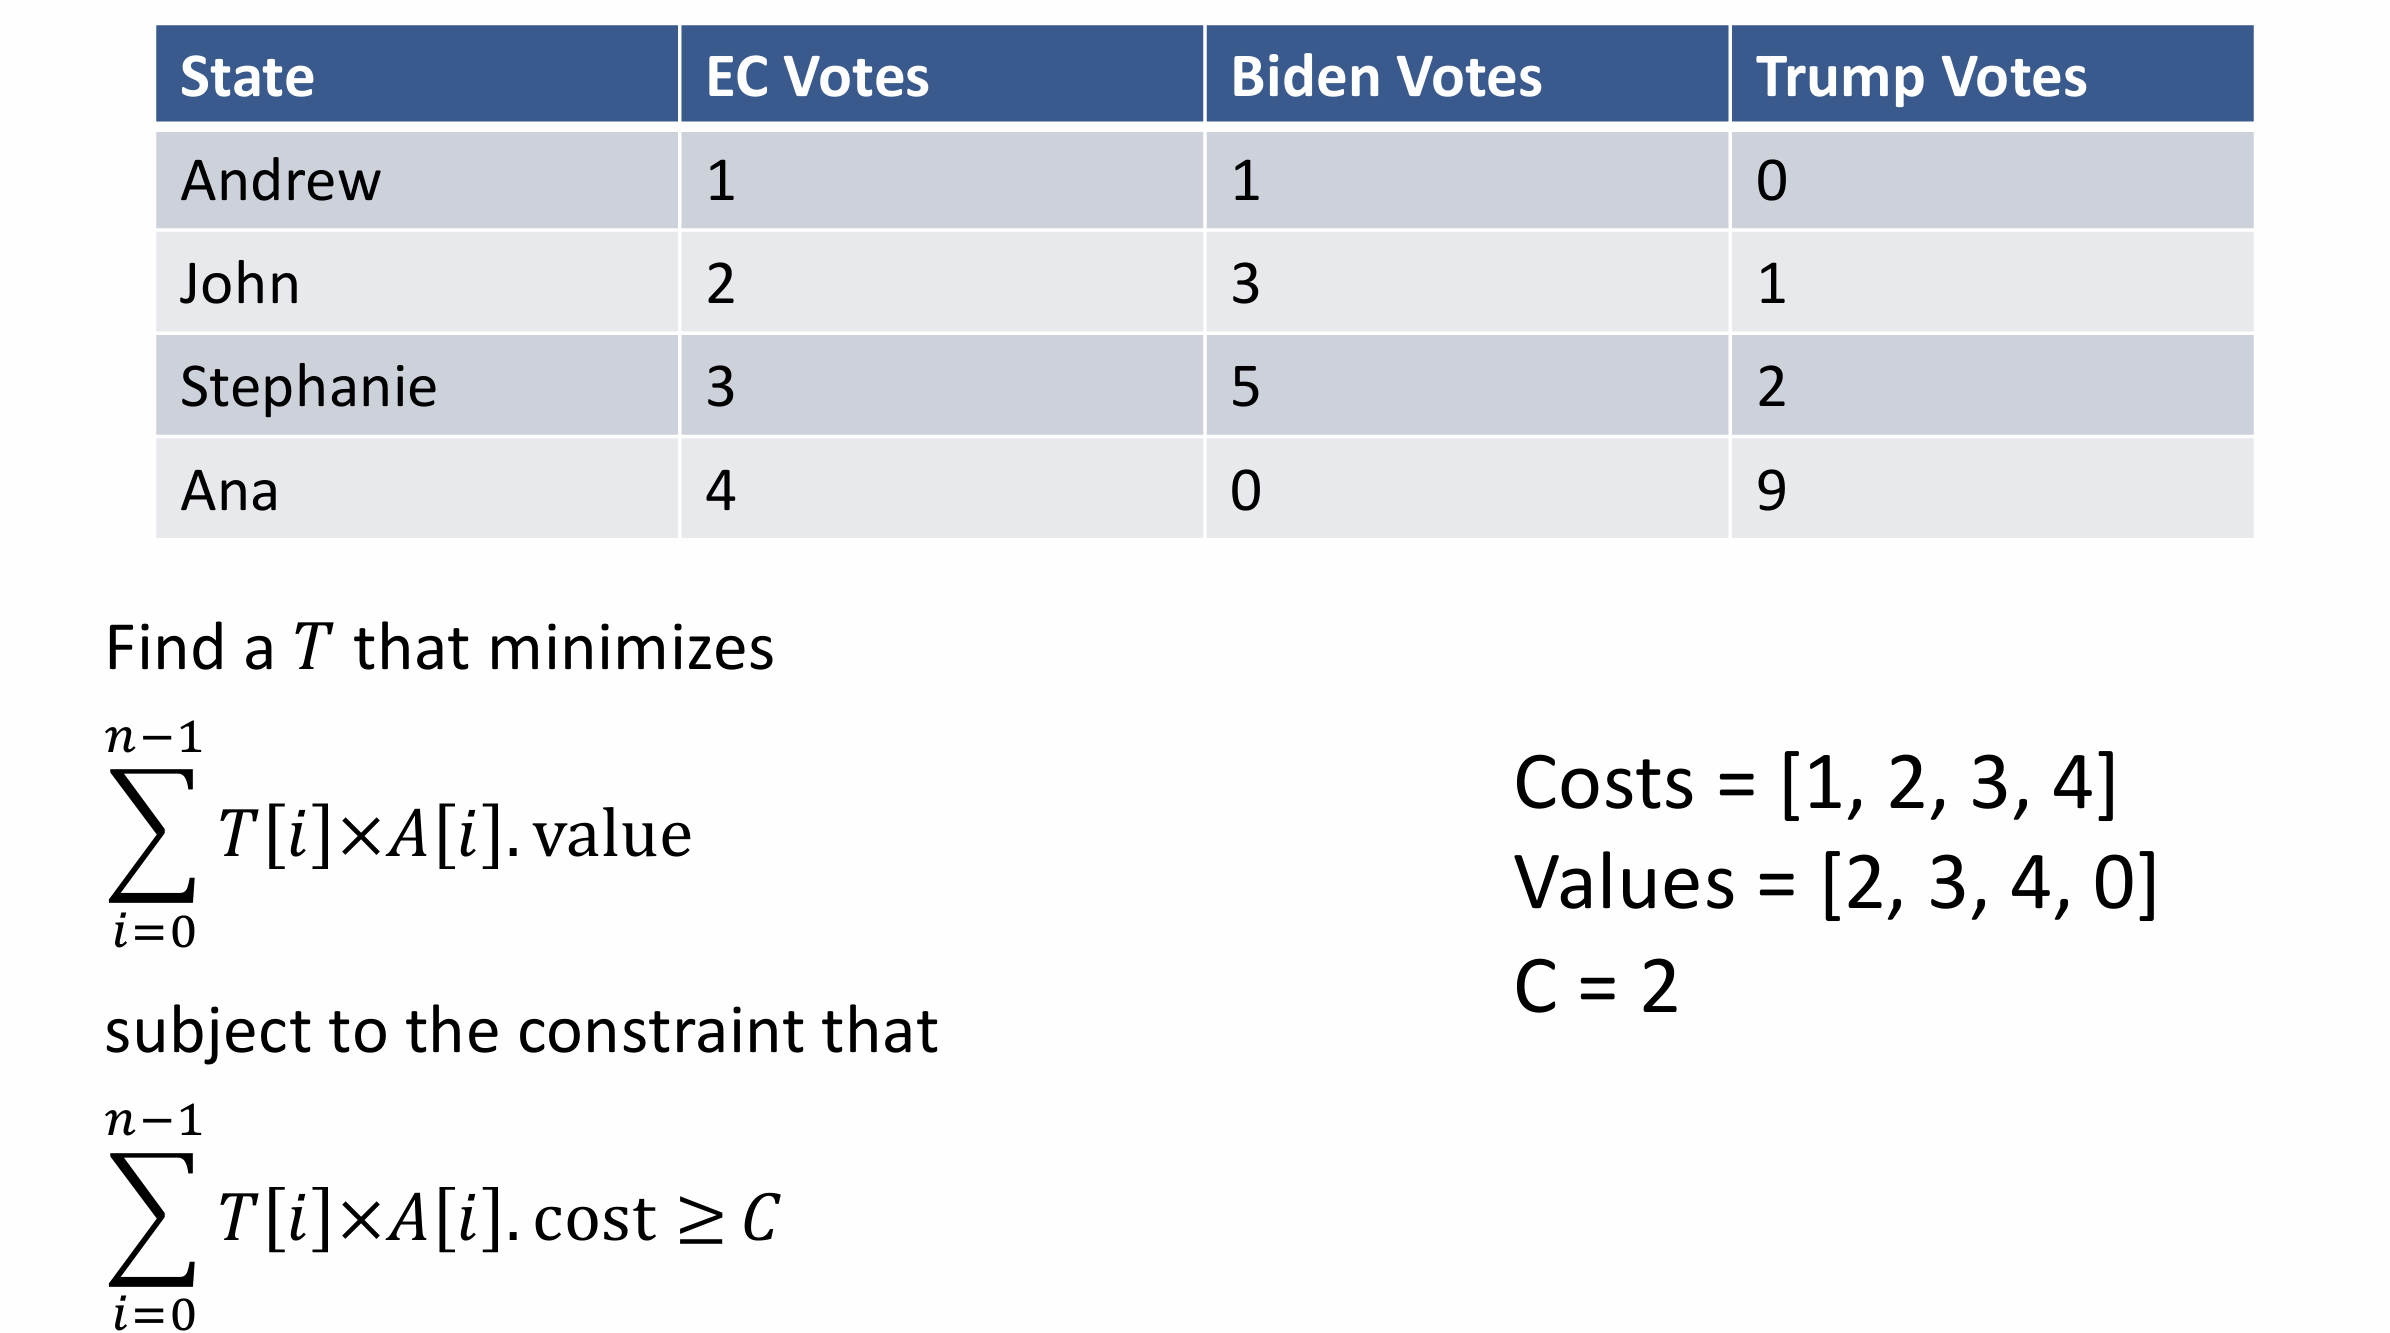

In this case, we can flip John in order to win

T = [0, 1, 0, 0]


***Reduction***:
- Solve a standard 0/1 knapsack problem
- item.value = same
- item.cost = same
- capacity = total cost - EC votes needed

Items not selected (the complement) are those whose total cost exceeds capacity while minimizing value

In this case, our C = 10-2 = 8

T = [1, 0, 1, 1]

T_C = [0, 1, 0, 0] --> only place we need to move votes

***Reduction to a Solved Problem***
- Take an exisiting problem we don't know how to solve
- Figure how to map it onto a problem we know how to solve
- Almost never have to invent a new algorithm
- Need to be familiar with previously studied problems and their solutions

**Decision Trees**
- Binary tree data structure

- Root node at the top
- - Branches come down
- - Intermediate notes
- - Nodes at the end of the tree are leaves
- *every non-leaf node has 1 or 2 branches*


Can use the tree to generate brute force search
- Generate all leaves
- Remove leaves that don't meet constraint
- Find best remaining leaf

Left-first, depth-first enumeration
-> Look through nodes from left down and then work back up and to the right

**More Efficiency**
- So far, decision tree is same as brute force
- O(n*2^n) --> decision tree brings to O(2^n)
- But we can explor the fact that the solution is along the path of root to leave
- As we generate tree, we can identify choices that won't work early in the process


**Implementation Plan**
- The tree is not actually built
- Paths explored traversed top down starting with root
- Element is elected from those still to be considered
- - If it fits, a new node is constructed with consequences of taking that item
- - Then explore consrequences of not taking item
- Process applied recursively to non-leaf children
- For any node, best solution is the better of the solutions for each child node



In [2]:
def decision_tree(items, capacity):
    """items a list of Item, capacity >= 0
       Solve the 0/1 knapsack problem.
       Return a tuple of an optimal subset of items and their
       total value"""
    # Recursively explore tree
    if not items or capacity == 0: # base case
        return (), 0
    item = items[0] # Get first item not yet seen
    if item.get_cost() > capacity: # Does current item fit
        return decision_tree(items[1:], capacity)
    # Recursively explore consequence of taking current item
    with_item, with_value = decision_tree(items[1:], capacity - item.get_cost())
    with_item += (item,)
    with_value += item.get_value()
    # Recursively explore consequence of not taking current item
    without_item, without_value = decision_tree(items[1:], capacity)
    # Update using better choice
    if with_value > without_value:
        return with_item, with_value
    else:
        return without_item, without_value

In [4]:
import random
import time

class Item(object):
    def __init__(self, n, v, w):
        self._name = n
        self._value = v
        self._calories = w
    def get_value(self):
        return self._value
    def get_cost(self):
        return self._calories
    def get_density(self):
        if self._calories > 0:
            return self._value / self._calories
        else:
            return float('inf')
    def __str__(self):
        return f'{self._name}: <{self._value}, {self._calories}>'


def build_menu(names, values, calories):
    """names, values, calories are lists of same length
       names are strings, values and calories are non-negative numbers
       returns a list of Items"""
    menu = []
    for i in range(len(values)):
        menu.append(Item(names[i], values[i], calories[i]))
    return menu

def generate_foods(num_foods, max_val, max_cal):
    names = [f'food{n}' for n in range(num_foods)]
    values = [random.randint(1, max_val) for _ in range(num_foods)]
    calories = [random.randint(1, max_cal) for _ in range(num_foods)]
    return names, values, calories

def test_funcs(func, num_items_list, limit, max_val, max_cost):
    for num_items in num_items_list:
        print(f'Test {func.__name__} for {num_items} items,'
              f' {limit} max')
        random.seed(0)
        names, values, calories = generate_foods(num_items,
                                                  max_val, max_cost)
        foods = build_menu(names, values, calories)
        random.seed()
        random.shuffle(foods)
        solution, value = func(foods, limit)
        print(f'Total value of items taken = {value}')
        # for item in solution:
        #     print(f'   {item}')

start_time = time.time()
test_funcs(decision_tree, (20,), 1000, 100, 300)
end_time = time.time()
tot_time = end_time - start_time
print(f'Elapsed time for decision_tree = {tot_time:.6f} seconds')


Test decision_tree for 20 items, 1000 max
Total value of items taken = 584
Elapsed time for decision_tree = 0.055696 seconds


Decision tree is considerably faster
But speed still decreases rapidly with size


***Dynamic Programming***


In [5]:
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
for i in range(0, 1001):
    print(f"Try fib: {fib(i)}")

Try fib: 1
Try fib: 1
Try fib: 2
Try fib: 3
Try fib: 5
Try fib: 8
Try fib: 13
Try fib: 21
Try fib: 34
Try fib: 55
Try fib: 89
Try fib: 144
Try fib: 233
Try fib: 377
Try fib: 610
Try fib: 987
Try fib: 1597
Try fib: 2584
Try fib: 4181
Try fib: 6765
Try fib: 10946
Try fib: 17711
Try fib: 28657
Try fib: 46368
Try fib: 75025
Try fib: 121393
Try fib: 196418
Try fib: 317811
Try fib: 514229
Try fib: 832040
Try fib: 1346269
Try fib: 2178309
Try fib: 3524578
Try fib: 5702887
Try fib: 9227465
Try fib: 14930352
Try fib: 24157817
Try fib: 39088169
Try fib: 63245986
Try fib: 102334155
Try fib: 165580141
Try fib: 267914296
Try fib: 433494437


KeyboardInterrupt: 

**Dynamic Programming**
- Trade time for space
- Create a table to record what we've done
- - Before computing fib(n) check if value of fib(n) already stored
- - - If so, look it up
- - - Else compute it and add to table
- Called memoization


In [6]:
def fast_fib(n, memo = None):
    if memo == None:
        memo = {}
    if n == 0 or n == 1:
        return 1
    try:
        return memo[n]
    except KeyError:
        result = fast_fib(n-1, memo) + fast_fib(n-2, memo)
        memo[n] = result
        return result

for i in range(0, 2001, 100):
    print(f'Try fib({i}) = {fast_fib(i):,}')


Try fib(0) = 1
Try fib(100) = 573,147,844,013,817,084,101
Try fib(200) = 453,973,694,165,307,953,197,296,969,697,410,619,233,826
Try fib(300) = 359,579,325,206,583,560,961,765,665,172,189,099,052,367,214,309,267,232,255,589,801
Try fib(400) = 284,812,298,108,489,611,757,988,937,681,460,995,615,380,088,782,304,890,986,477,195,645,969,271,404,032,323,901
Try fib(500) = 225,591,516,161,936,330,872,512,695,036,072,072,046,011,324,913,758,190,588,638,866,418,474,627,738,686,883,405,015,987,052,796,968,498,626
Try fib(600) = 178,684,461,669,052,552,311,410,692,812,805,706,249,615,844,217,278,044,703,496,837,914,086,683,543,763,273,909,969,771,627,106,004,287,604,844,670,397,177,991,379,601
Try fib(700) = 141,530,751,622,060,734,789,349,637,541,611,806,906,560,581,814,825,656,065,057,782,655,897,254,318,057,662,142,341,135,314,844,769,422,903,905,867,863,877,139,246,681,886,097,354,486,547,763,701
Try fib(800) = 112,102,381,301,657,019,753,922,131,204,008,107,032,943,249,802,439,891,737,991,1

**Dynamic Programming**
- If a solution to a subproblem can be found by combining solutions to smaller subproblems
- If computation involves solving same subproblem multiple times, we should be able to avoid repeating that computation
- - Memoization lets us save results
- Dynamic programming is algorithmic method that applies when both conditions hold
- `Tablular Method`: 
- - Memoization is top-down, add entries as you solve
- - Tabular is bottom-up: pre-allocate memo table and solve smallest problems and move up

**************************************
If original problem requires all subproblems to be solved, tabular method is better

If onloy some need to be solved, memoization is better
**************************************


Dynamic programming algorithm always finds an optimal answer, but doesn't always speed things up

Formally, it is appropriate with 2 characteristics:
1. Optimal substructure: a globally optimal solution can be found by combining optimal solutions to local subproblems
2. Overlapping subproblems: finding an optimal solution involves solving the same subproblem multiple times

-----------------------------------------------------------------------------------------------------

***Does the knapsack problem exhibit optimal substructure and overlapping subproblems?***
- Optimal substructure because we have a tree of taking or not taking items
- Overlapping subproblems is less obvious

If we have items D-I and want to find optimal subset

We can consider two nodes:
1. We took only B
2. We took A and C

Same problem:
- Given a remaining budget, find optimal subset of items D-I

Problem Formalized:
- Given remaining capacity, maximize value by choosing among remaining items
- Set of previously chosen items doesn't matter
- - Only need to consider cost remaining and items remaining

***Use memoization***:
1. Add memo (a dictionary) as a third argument
2. Key of memo is a tuple: (remaining items, available capacity) --> remaining items is len(items) because we work left to right
3. Value associated with key is best solution, plus its optimal total value
4. Modifications to body -> first check whether optimal choice of items given the available cost is already in the memo
5. Last, update the memo



In [7]:
def knapsack_memo(items, capacity, memo = None):
    """items a list of Item, capacity >= 0
       Solve the 0/1 knapsack problem.
       Return a tuple of an optimal subset of items and their
       total value"""
    global num_calls # for pedagogical reasons
    num_calls += 1
    # Recursively explore tree
    if not items or capacity == 0: # base case
        return (), 0
    if memo == None:
        memo = {}
    if (len(items), capacity) in memo:
        return memo[(len(items), capacity)]
    item = items[0] # Get first item not yet seen
    if item.get_cost() > capacity: # Does current item fit
        return knapsack_memo(items[1:], capacity, memo)
    # Recursively explore consequence of taking current item
    with_item, with_value = knapsack_memo(items[1:], capacity - item.get_cost(),
                                     memo)
    with_item += (item,)
    with_value += item.get_value()
    # Recursively explore consequence of not taking current item
    without_item, without_value = knapsack_memo(items[1:], capacity, memo)
    # Update memo and return better choice
    if with_value > without_value:
        memo[(len(items), capacity)] = (with_item, with_value)
        return with_item, with_value
    else:
        memo[(len(items), capacity)] = (without_item, without_value)
        return without_item, without_value

In [9]:
seed = 1
capacity = 10
max_val = 5
max_cost = 2
num_items = 20
num_calls = 0

random.seed(seed)
test_funcs(knapsack_memo, (num_items,), capacity, max_val, max_cost)

Test knapsack_memo for 20 items, 10 max
Total value of items taken = 32


In [10]:
# Try it on examples of increasing size
random.seed(1)
for exp in range(1, 11):
    num_calls = 0
    num_items = 2**exp
    test_funcs(knapsack_memo, (num_items,), 1000, 100, 300)
    print(f'Number of invocations of knap_sack_memo = {num_calls:,}')


Test knapsack_memo for 2 items, 1000 max
Total value of items taken = 148
Number of invocations of knap_sack_memo = 7
Test knapsack_memo for 4 items, 1000 max
Total value of items taken = 208
Number of invocations of knap_sack_memo = 31
Test knapsack_memo for 8 items, 1000 max
Total value of items taken = 363
Number of invocations of knap_sack_memo = 433
Test knapsack_memo for 16 items, 1000 max
Total value of items taken = 594
Number of invocations of knap_sack_memo = 12,145
Test knapsack_memo for 32 items, 1000 max
Total value of items taken = 854
Number of invocations of knap_sack_memo = 41,294
Test knapsack_memo for 64 items, 1000 max
Total value of items taken = 1225
Number of invocations of knap_sack_memo = 175,214
Test knapsack_memo for 128 items, 1000 max
Total value of items taken = 1763
Number of invocations of knap_sack_memo = 314,375
Test knapsack_memo for 256 items, 1000 max
Total value of items taken = 2803
Number of invocations of knap_sack_memo = 634,991
Test knapsack_m

In [ ]:
def knapsack_tabular(items, capacity):
    n = len(items)

    # Initialize the DP table with all 0s,
    # with (n + 1) rows and (capacity + 1) columns
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if items[i-1].get_cost() <= w:  # If current item can be included
                # Max of including the item or not including the item
                dp[i][w] = max(dp[i-1][w],
                               dp[i-1][w-items[i-1].get_cost()] +\
                                   items[i-1].get_value())
            else:
                dp[i][w] = dp[i-1][w]  # Exclude the item

    # Traceback to find the items in the optimal solution
    result_value = dp[n][capacity]
    w = capacity
    selected_items = []

    for i in range(n, 0, -1):
        # If the current item is included in the optimal solution
        if dp[i][w] != dp[i-1][w]:
            selected_items.append(items[i-1])
            w -= items[i-1].get_cost()  # Reduce the remaining weight

    return selected_items, result_value

# # Try it on examples of increasing size
random.seed(1)
start_time = time.time()
for exp in range(1, 11):
    num_calls = 0
    num_items = 2**exp
    test_funcs(knapsack_tabular, (num_items,), 1000, 100, 300)
end_time = time.time()
tot_time = end_time - start_time
print(f'Elapsed time for knapsack_tabular = {tot_time:.6f} seconds')


Test knapsack_tabular for 2 items, 1000 max
Total value of items taken = 148
Test knapsack_tabular for 4 items, 1000 max
Total value of items taken = 208
Test knapsack_tabular for 8 items, 1000 max
Total value of items taken = 363
Test knapsack_tabular for 16 items, 1000 max
Total value of items taken = 594
Test knapsack_tabular for 32 items, 1000 max
Total value of items taken = 854
Test knapsack_tabular for 64 items, 1000 max
Total value of items taken = 1225
Test knapsack_tabular for 128 items, 1000 max
Total value of items taken = 1763
Test knapsack_tabular for 256 items, 1000 max
Total value of items taken = 2803
Test knapsack_tabular for 512 items, 1000 max
Total value of items taken = 3768
Test knapsack_tabular for 1024 items, 1000 max
Total value of items taken = 4740
Elapsed time for knapsack_tabular = 0.954051 seconds


In [12]:
for func in (knapsack_memo, knapsack_tabular):
    random.seed(1)
    start_time = time.time()
    test_funcs(func, (1024,), 1000, 100, 300)
    end_time = time.time()
    tot_time = end_time - start_time
    print(f'Elapsed time for {func.__name__} = {tot_time:.6f} seconds')

Test knapsack_memo for 1024 items, 1000 max
Total value of items taken = 4740
Elapsed time for knapsack_memo = 13.725269 seconds
Test knapsack_tabular for 1024 items, 1000 max
Total value of items taken = 4740
Elapsed time for knapsack_tabular = 0.466419 seconds


**How does dynamic programming actually help?**
- Computational complexity can be subtle
- Algorithm falls into a complexity class called pseudo-polynomial
- Such algorithms are polynomial (often linear) in the value of the input
- They are exponential in the storage size needed to represent the input


***Knapsack Memo:***
- Polynomial in number of distinct pairs
- - For each pair we only solve the problem once
- Possibilities for items argument
- - Solces of the original items input from each index to end
- - Length of items is proportional to its storage size
- Possibilities for capacity argument trickier to analyze


- Possibilities are the value of original capacity minus sum of weights for any subset of items while remaining nonnegative
- Bounded by trhe number of distinct sums of weights that don't exceed capacity
- If weights are integral, this is linear in the value of capacity, which is exponential in the number of bits needed to represent capacity
- This is called pseudo-polynomial runtime

As number of items increases so does the chance that items have the same cost making shared subproblems more likely

With non-integer weights, this becomes less likely


**HW**
- Look at implementation of tabular method
- What is it's complexity
- Will it work if values are floats?

***Take Home Messages***:
- Many problems of practical importance can be formulated through optimization
- Greedy algorithms give decent estimations
- Finding an optimal solution is exponentially hard
- Dynamic programming yields good performance when
- - There is optimal substructure and overlapping subproblems
- - Solution is always correct, fast under right circumstances